In [5]:
# 编程实现 PCA 和白化变换, 可以使用 eig 或 svd 等函数, 但不能使用 princomp

import numpy as np
import matplotlib.pyplot as plt

def pca(X, k=None):
    # 0. k = X.shape[1] if k == None
    if k == None:
        k = X.shape[1]

    # 1. Subtract the mean
    X_centered = X - X.mean(axis = 0)
 
    # 2. Get the covariance matrix: 1/m * X^TX
    cov_matrix = (1 / X_centered.shape[0]) * (X_centered.T @ X_centered)
 
    # 3. Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenmatrix = np.linalg.eig(cov_matrix)

    # 4. Sort by eigenvalues and get matrix P (topK eigenvectors)
    idx = np.argsort(eigenvalues)[::-1]
    P = eigenmatrix[:, idx[:k]]

    # 5. Get X after dimensionality reduction
    X_pca = X_centered @ P
    return X_pca


def pca_whiten(X, k=None):
    # 0. k = X.shape[1] if k == None
    if k == None:
        k = X.shape[1]

    # 1. Subtract the mean
    X_centered = X - X.mean(axis = 0)

    # 2. Get the covariance matrix: 1/m * X^TX
    cov_matrix = (1 / X.shape[0]) * (X.T @ X)

    # 3. Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # 4. Sort by eigenvalues
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues_sorted = eigenvalues[idx[:k]]
    eigenvectors_sorted = eigenvectors[:, idx[:k]]

    # 5. Get X after whitening
    epsilon = 1e-5
    X_whiten = X_centered @ eigenvectors_sorted / np.sqrt(eigenvalues_sorted + epsilon)

    return X_whiten

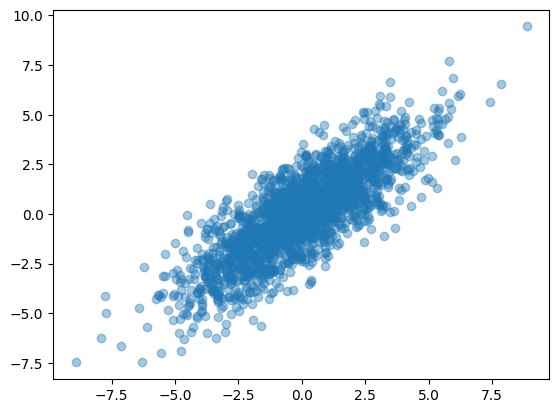

In [6]:
# (a) x = randn(2000, 2) * [2 1; 1 2] 生成 2000 个样本,
#     每个样本二维, 使用 scatter 画出这 2000 个样本.

# randn(2000, 2) * [2 1; 1 2]
X = np.random.randn(2000, 2) @ np.array([[2, 1], [1, 2]])

# Draw scatter plot
plt.scatter(X.T[0], X.T[1], alpha=0.4)
plt.show()

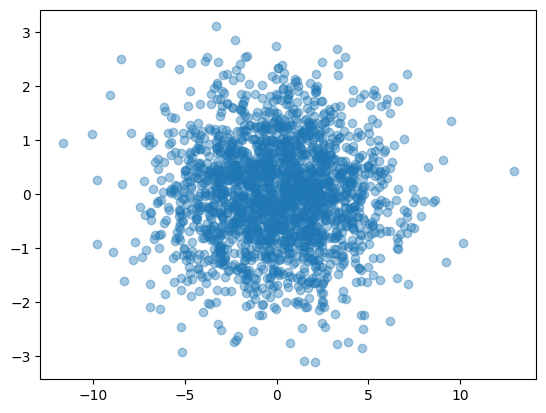

In [7]:
# (b) 对这些样本进行 PCA 变换并保留所有的 2 个维度,
#     使用 scatter 画出 PCA 后的样本.

X_whiten = pca(X)

# Draw scatter plot
plt.scatter(X_whiten.T[0], X_whiten.T[1], alpha=0.4)
plt.show()

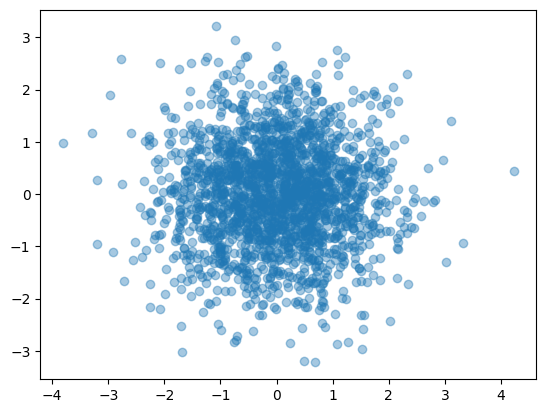

In [8]:
# (c) 对这些样本进行白化变换并保留所有的 2 个维度,
#     使用 scatter 画出 PCA 后的样本.

X_whiten = pca_whiten(X)

# Draw scatter plot
plt.scatter(X_whiten.T[0], X_whiten.T[1], alpha=0.4)
plt.show()